In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [31]:
from sklearn.manifold import TSNE

In [2]:
tps_db = pd.read_csv('../data/clean_data/tps_db_v1.csv')

In [3]:
tps_db

,id,sequence,kingdom,type,pfam_architecture,supfam_architecture,PF06330.14,PF01397.24,PF03936.19,PF00494.22,...,PF19086.3,PF13243.9,0041184,0053354,0053355,0048261,0048806,0046340,0047573,length
0,A0A6P6W6H5,MAIINLPVPTNSSSEVNKHNHLRSCLPSGRATFTTLSAAAMRSATM...,Plantae,sesqui,"['PF01397.24', 'PF03936.19']",['0048261'],0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,606
1,XsTC-1,MSEKNVVRIPMKWGRIEREILTQNTIPELVDTNRLISWVKECNLAD...,Animalia (Coral),di,['PF19086.3_partial'],['0053355'],0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,410
2,XsTC-1,MSEKNVVRIPMKWGRIEREILTQNTIPELVDTNRLISWVKECNLAD...,Animalia (Coral),sesqui,['PF19086.3_partial'],['0053355'],0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,410
3,X5AHD9,MSITINLRVIAFPGHGVQSRQGIFAVMEFPRNKNTFKSSFAVKCSL...,Plantae,di,"['PF01397.24', 'PF03936.19']","['0041184', '0053355']",0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,587
4,X5A4D6,MGSLSTMNLNHSPMSYSGILPSSSAKAKLLLPGCFSISAWMNNGKN...,Plantae,di,"['PF13243.9_partial', 'PF01397.24', 'PF03936.1...","['0041184', '0053355']",0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,A0A075FA51,MGSLSTLNLIKTCVTLASSEKLNQPSQCYTISTCMKSSNNPPFNYY...,Plantae,di,"['PF13243.9_partial', 'PF01397.24', 'PF03936.1...","['0041184', '0053355']",0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,785
1194,A0A067SEC9,MNTTTRTFYLPRLEDTFSVFPDNGLNPHYAECRIQSQAWIDKYYKI...,Fungi,sesqui,['PF19086.3'],['0047573'],0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,345
1195,A0A059PYD5,MDMPAKEEKVIRPIVHFPPSVWADQFLIFDDKQAEQANIEQVVNEL...,Plantae,mono,"['PF01397.24', 'PF03936.19']",['0048261'],0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,550
1196,A0A023J8Z5,MSSAKLGSASEDVSRRDANYHPTVWGDFFLTHSSNFLENNHSILEK...,Plantae,sesqui,"['PF01397.24', 'PF03936.19']",['0048261'],0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,547


In [11]:
tps_db['type'] = tps_db.groupby('id')['type'].transform(lambda group: 'mixed' if len(group) > 1 else group.iloc[0])

In [14]:
tps_db = tps_db.drop_duplicates()

In [4]:
results_path = 'results'
file_list = os.listdir(results_path)

In [44]:
EMB_LAYER = 5
Xs = []
types = []
kingdoms = []
for esm_file in file_list:
    seq_name = esm_file.split('.pt')[0]
    if seq_name in tps_db['id'].tolist():
        embs = torch.load(f'{results_path}/{esm_file}')
        Xs.append(embs['mean_representations'][5])
        type_general=tps_db[tps_db['id'] == seq_name]['type'].to_list()[0]
        kingdom = tps_db[tps_db['id'] == seq_name]['kingdom'].to_list()[0]
        types.append(type_general)
        kingdoms.append(kingdom)
    else:
        print(seq_name)

ATN39899.1
Q50L36
Q5NP67
Q6EJ97
Q6N3F1
Q7XAS7
Q9AR86


In [45]:
Xs2 = torch.stack(Xs, dim=0).numpy()

In [38]:
type_cmap = {'sesqui': '#F9C000', 
             'mono': '#FF4D6F', 
             'tri': '#579EA4', 
             'di': '#7E1A2F', 
             'sester': '#DF7713', 
             'sesquar': '#C8350D', 
             'tetra': '#86AD34', 
             'mixed': '#BD777A'
            }

In [30]:
kingdom_cmap = {'Plantae': '#BEDF7C', 
                'Fungi':'#ff9481', 
                'Bacteria':'#995FBC',
                'Animalia (Coral)':'#FFAFF8',
                'Amoebozoa':'#83d4c9',
                'Animalia':'#94ccfc',
                'Animalia (Marine Sponge)':'#94ccfc',
                'Animalia (Insecta)':'#ffbd45', 
                'Red algae': '#EF4364', 
               }

In [59]:
X_embedded3 = TSNE(n_components=2, learning_rate='auto', init='pca', random_state=42, perplexity=100).fit_transform(Xs2)

C:\Users\terca\anaconda3\envs\esm_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\terca\anaconda3\envs\esm_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\terca\anaconda3\envs\esm_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\terca\anaconda3\envs\esm_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

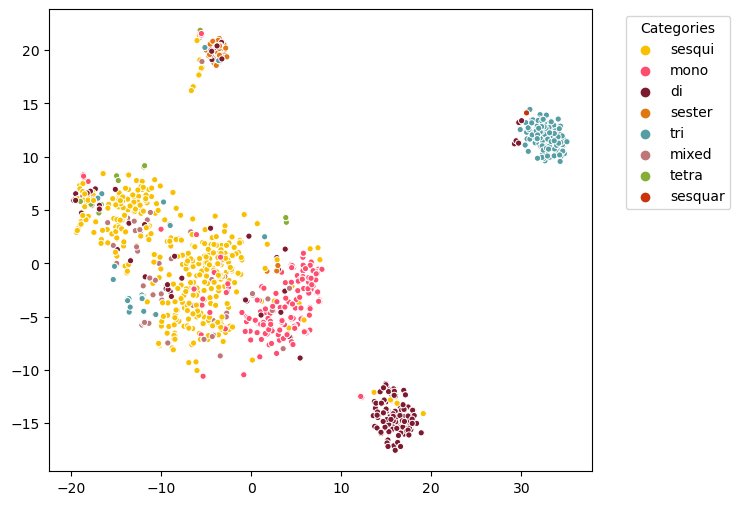

In [60]:
fig_dims = (7, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sc = sns.scatterplot(x=X_embedded3[:, 0], y=X_embedded3[:, 1], hue=ys, palette=type_cmap, marker='.', s=80, ax=ax)
legend = ax.legend(title="Categories", bbox_to_anchor=(1.05, 1), loc='upper left')

C:\Users\terca\anaconda3\envs\esm_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\terca\anaconda3\envs\esm_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\terca\anaconda3\envs\esm_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\terca\anaconda3\envs\esm_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

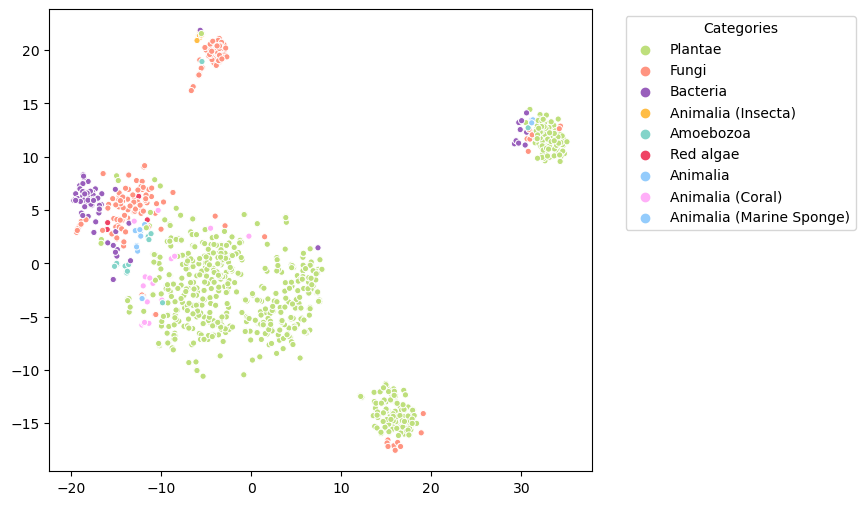

In [61]:
fig_dims = (7, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sc = sns.scatterplot(x=X_embedded3[:, 0], y=X_embedded3[:, 1], hue=kingdoms, palette=kingdom_cmap, marker='.', s=80, ax=ax)
legend = ax.legend(title="Categories", bbox_to_anchor=(1.05, 1), loc='upper left')

C:\Users\terca\anaconda3\envs\esm_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\terca\anaconda3\envs\esm_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\terca\anaconda3\envs\esm_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\terca\anaconda3\envs\esm_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

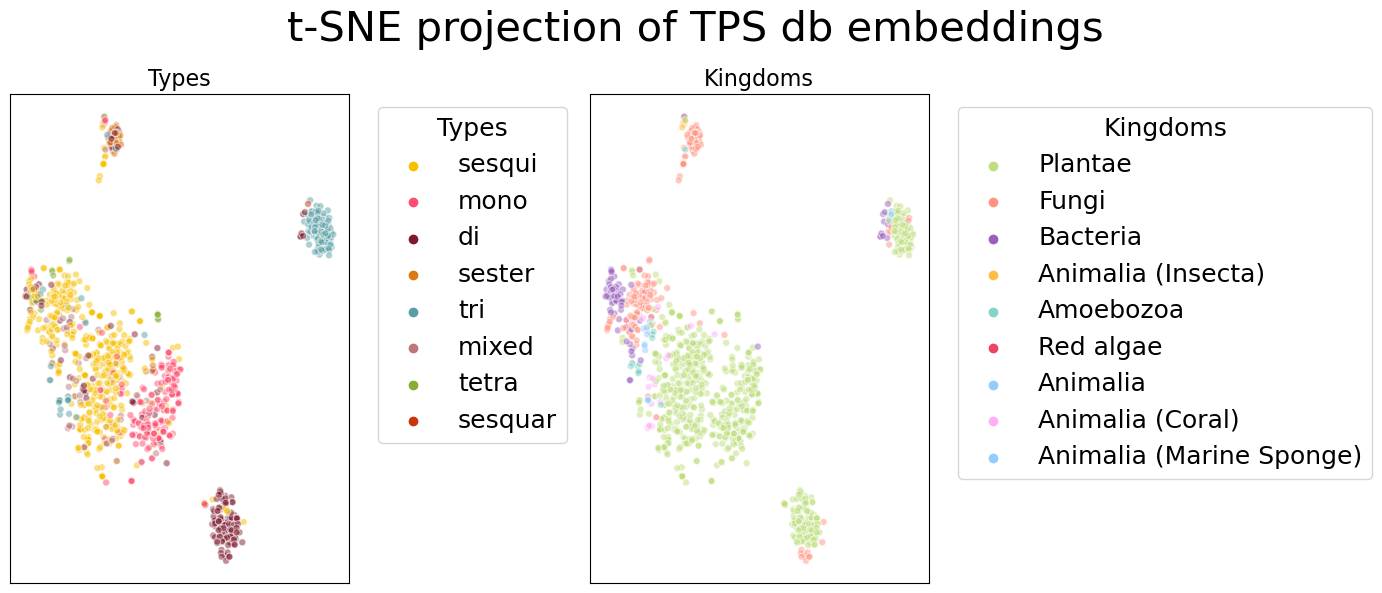

In [85]:
# Create a figure and subplot grid with two columns and one row
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(x=X_embedded3[:, 0], y=X_embedded3[:, 1], hue=ys, palette=type_cmap, marker='.', s=100, ax=axes[0], alpha=0.5)
axes[0].legend(title="Types", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=18, title_fontsize=18)
axes[0].set_title('Types', fontsize=16)
axes[0].set_xticklabels([])
axes[0].set_yticklabels([])
axes[0].tick_params(axis='both', which='both', length=0)

sns.scatterplot(x=X_embedded3[:, 0], y=X_embedded3[:, 1], hue=kingdoms, palette=kingdom_cmap, marker='.', s=100, ax=axes[1], alpha=0.5)
axes[1].legend(title="Kingdoms", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=18, title_fontsize=18)
axes[1].set_title('Kingdoms', fontsize=16) 
axes[1].set_xticklabels([])
axes[1].set_yticklabels([])
axes[1].tick_params(axis='both', which='both', length=0)

fig.suptitle('t-SNE projection of TPS db embeddings', fontsize=30)

plt.tight_layout()
#plt.show()
plt.savefig('tsne.png', dpi=300)
plt.savefig('tsne.svg')